In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
original_data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_train = df_train.drop('id', axis = 1)

In [5]:
original_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [6]:
original_data = original_data.drop('RowNumber', axis = 1)

In [7]:
original_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [8]:
df = pd.concat([df_train, original_data], axis = 0)

In [9]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [10]:
df = df.drop_duplicates()
df = df.dropna()

In [11]:
df = df.drop('CustomerId', axis = 1)
df = df.drop('Surname', axis = 1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [13]:
print(df['Geography'].unique())
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

['France' 'Spain' 'Germany']


In [14]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,175030.000000,175030.000000,175030.000000,175030.000000,175030.000000,175030.000000,175030.000000,175030.000000,175030.000000,175030.000000,175030.000000
mean,656.114506,0.654134,0.563355,38.171301,5.019951,56677.296954,1.553071,0.751186,0.498749,111862.765702,0.211152
std,81.148932,0.817515,0.495971,8.969551,2.811144,62982.318837,0.549211,0.432327,0.500000,50815.153467,0.408127
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73225.310000,0.000000
50%,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000
75%,710.000000,1.000000,1.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


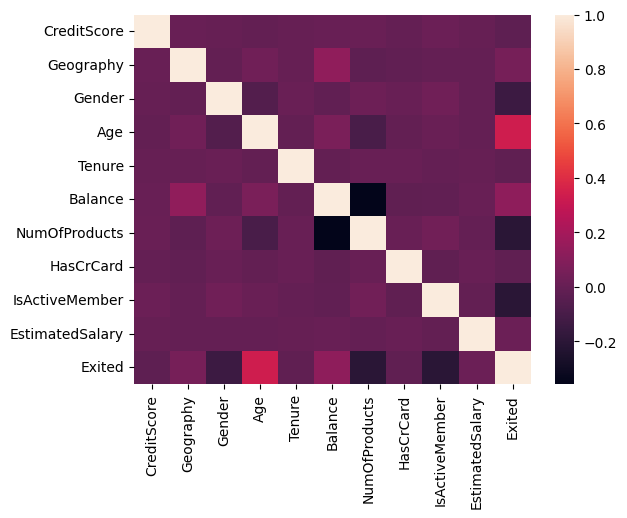

In [15]:
plot = sns.heatmap(df.corr())
plt.show()

In [16]:
class churn_NN(nn.Module):
    def __init__(self, input_size, output_size):
        super(churn_NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        return x

In [17]:
X_train = df.drop('Exited', axis = 1)
y_train = df['Exited']

In [18]:
X_train = torch.tensor(X_train.values)
y_train = torch.tensor(y_train.values)

In [19]:
# model = churn_NN(X_train.shape[1], output_size=1)
# criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# # Training loop
# num_epochs = 400
# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model(X_train)
#     loss = criterion(outputs, y_train)

#     # Backward pass and optimization
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     # Print training progress
#     if (epoch + 1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# # # Test the trained model on new data
# # X_test = torch.randn((5, input_size))
# # with torch.no_grad():
# #     predicted_y = model(X_test)
# #     print("\nPredicted Output:\n", predicted_y)